In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
orig_col_headers = ['credit_score', 'first_payment_date', 'first_time_homebuyer_flag', 'maturity_date', 'metropolitan_stat_area', 'mortgage_insurance_perc', 'no_unit', 'occupancy_status', 'orig_combined_loantovalue', 'orig_debttoincome', 'orig_upb', 'orig_loantovalue', 'orig_interest_rate', 'channel', 'prepayment_penalty_mortgage_flag', 'product_type', 'property_state', 'property_type', 'postal_code', 'loan_sequence_no', 'loan_purpose', 'orig_loan_term', 'no_borrower', 'seller_name', 'service_name', 'super_conforming_flag']

In [4]:
perform_col_headers = ['loan_sequence_no', 'monthly_reporting_period', 'curr_actual_upb', 'curr_loan_delinquency_status', 'loan_age', 'remaining_months_to_legal_maturity', 'repurchase_flag', 'modification_flag', 'zero_balance_code', 'zero_balance_effective_date', 'curr_interest_rate', 'curr_deferred_upb', 'due_date_last_paid_installment', 'mi_recoveries', 'net_sales_proceeds', 'non_mi_recoveries', 'expenses', 'legal_costs', 'maintain_preserve_costs', 'tax_insurance', 'miscellaneous_expense', 'actual_loss_calculation', 'modification_cost']

In [ ]:
# Legacy
orig_file_list = ['historical_data1_Q{0}{1}/historical_data1_time_Q{0}{1}.txt'.format(quarter, year) for quarter in range(1, 5) for year in range(2007, 2010)]
orig_df_list = [pd.read_csv(file, sep='|', names=orig_col_headers) for file in orig_file_list]
orig_concat_df = pd.concat(orig_df_list, ignore_index=True)

In [15]:
orig_df_list = []
perf_df_list = []

for year in range(2007, 2010):
    for quarter in range(1, 5):
        orig_file = 'historical_data1_Q{0}{1}/historical_data1_Q{0}{1}_clean.csv'.format(quarter, year)
        orig_df = pd.read_csv(orig_file)
        orig_df['year'] = year
        orig_df['quarter'] = 'Q{0}'.format(quarter)
        orig_df_list.append(orig_df)
        
orig_concat_df = pd.concat(orig_df_list, ignore_index=True)

In [16]:
orig_concat_df.head()

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_stat_area,mortgage_insurance_perc,no_unit,occupancy_status,orig_combined_loantovalue,orig_debttoincome,orig_upb,orig_loantovalue,orig_interest_rate,channel,prepayment_penalty_mortgage_flag,product_type,property_state,property_type,postal_code,loan_sequence_no,loan_purpose,orig_loan_term,no_borrower,seller_name,service_name,year,quarter
0,681,200703,Y,203702,48424.0,30,1.0,O,95,46,271000,95,7.125,R,N,FRM,FL,PU,33400.0,F107Q1000001,P,360,1.0,Other sellers,Other servicers,2007,Q1
1,813,200703,N,203702,0.0,30,1.0,S,95,45,133000,95,6.125,R,N,FRM,OR,SF,97800.0,F107Q1000002,P,360,1.0,Other sellers,USBANKNA,2007,Q1
2,644,200703,Y,203702,35644.0,0,2.0,O,80,42,404000,80,6.250,R,N,FRM,NJ,SF,7000.0,F107Q1000003,P,360,2.0,Other sellers,Other servicers,2007,Q1
3,757,200703,N,203702,0.0,0,1.0,O,70,38,83000,70,6.375,R,N,FRM,IN,SF,47500.0,F107Q1000004,C,360,1.0,Other sellers,Other servicers,2007,Q1
4,800,200703,N,203702,0.0,0,1.0,O,43,37,54000,43,6.500,R,N,FRM,ME,MH,4600.0,F107Q1000005,P,360,1.0,Other sellers,Other servicers,2007,Q1


#### Original UPB vs Quarter, Year

In [17]:
orig_upb_df = orig_concat_df.groupby(['year', 'quarter'])['orig_upb'].mean().unstack('quarter')
orig_upb_df.head()

quarter,Q1,Q2,Q3,Q4
year,,,,
2007,184353.621069,181350.261439,177580.357111,190836.389339
2008,203238.287599,202256.655613,198830.514814,211877.664549
2009,219418.163673,214826.992762,207785.704931,212472.123044


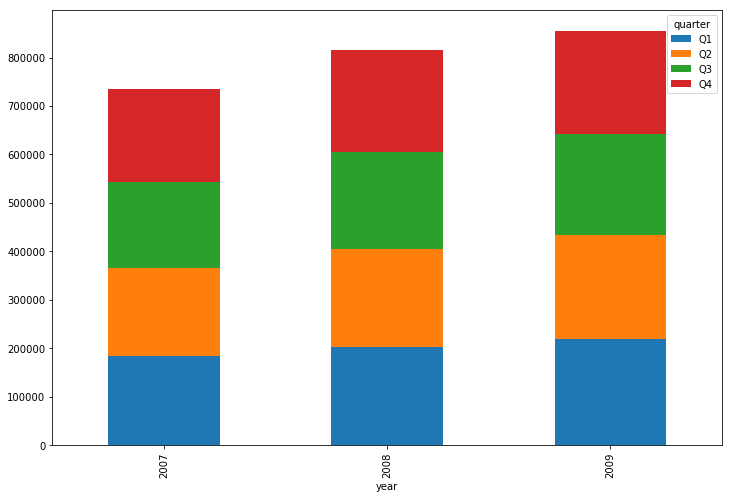

In [51]:
orig_upb_df.plot(kind='bar', stacked=True)

Original Upb increased in the three years, probably indicating the economic recession had less and less effect. There is no significant difference among the four quarters.

Original Interest Rate vs Quarter, Year

In [68]:
orig_interest_rate_df = orig_concat_df.groupby(['year', 'quarter'])['orig_interest_rate'].mean().unstack('quarter')
orig_interest_rate_df.head()

quarter,Q1,Q2,Q3,Q4
year,,,,
2007,6.206453,6.294015,6.663508,6.357477
2008,5.878383,6.023509,6.418933,5.909702
2009,4.939941,4.849873,5.125566,4.926026


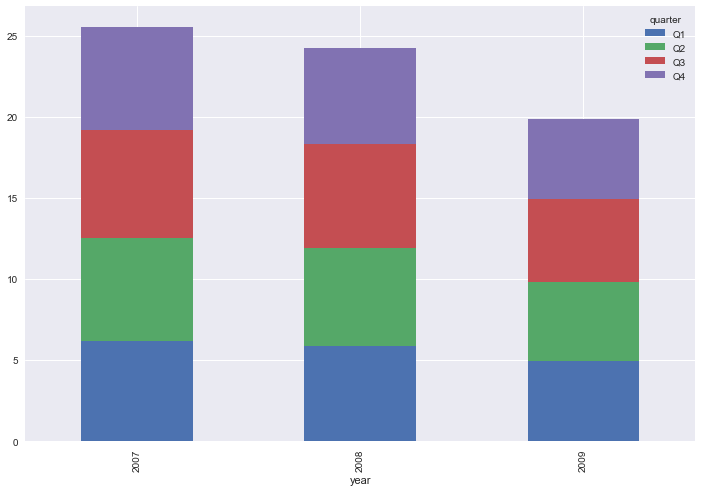

In [69]:
orig_interest_rate_df.plot(kind='bar', stacked=True)

The interest rate decreased, indicating the subprime mortgage crisis moderated. Again four quarters basically have similar data.

Correlation Coefficient

In [55]:
x_cols = ['mortgage_insurance_perc', 'orig_combined_loantovalue', 'orig_debttoincome', 'orig_upb', 'orig_loantovalue']

labels = []
values = []

for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(orig_concat_df[col].values, orig_concat_df['orig_interest_rate'].values)[0,1])
    
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values}).sort_values(by='corr_values')
corr_df

,col_labels,corr_values
3,orig_upb,-0.156732
2,orig_debttoincome,0.235741
0,mortgage_insurance_perc,0.248691
1,orig_combined_loantovalue,0.250467
4,orig_loantovalue,0.250647


There is no strong correlation between these columns above and interest rate. But we can see which column has positive and negative with interest rate.

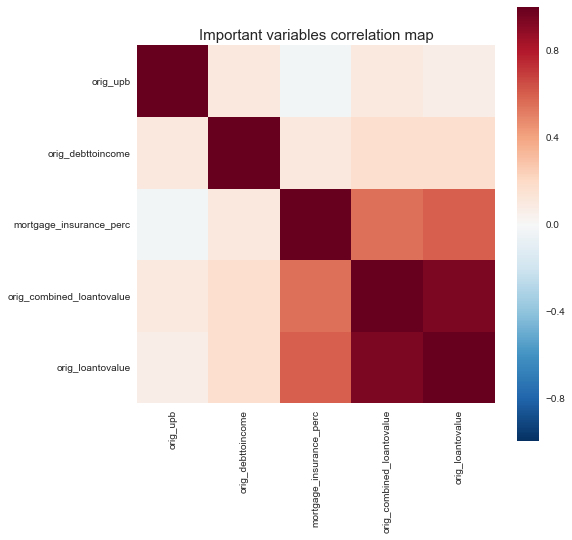

In [56]:
temp_df = orig_concat_df[corr_df['col_labels']]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

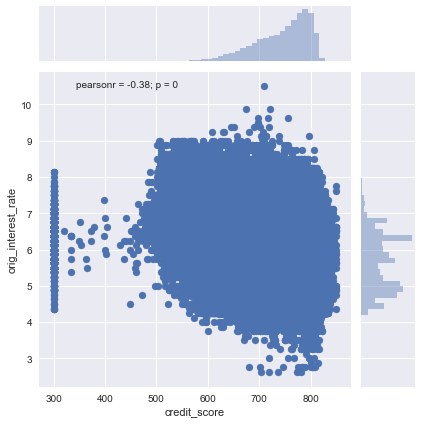

In [54]:
sns.jointplot(x='credit_score', y='orig_interest_rate', data=orig_concat_df)

There is no strong pattern between credit_socre and original interest rate.

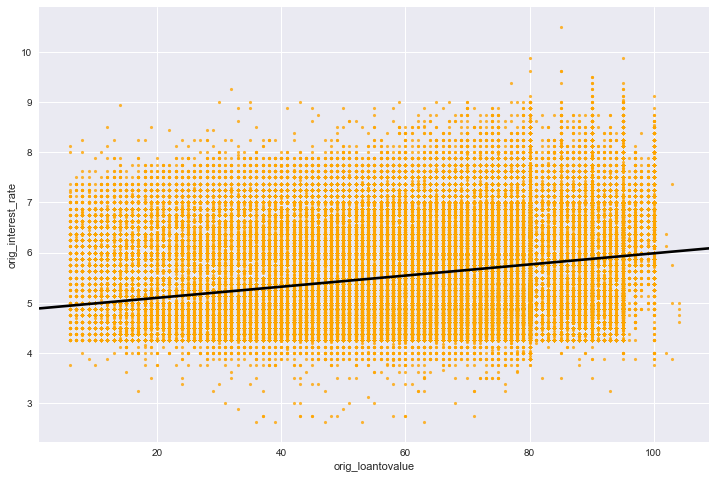

In [22]:
sns.regplot(x='orig_loantovalue', y='orig_interest_rate', data=orig_concat_df, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"})

High loan to value indicates the people's deficiency of funds, which leads to higher interest rate.

In [18]:
import plotly
plotly.tools.set_credentials_file(username = 'liujiahua2014', api_key = 'c5QSIWnrF9HmSEoPnwMY')

In [19]:
def plotStateMap(df, col, state_col):

    data = [dict(type='choropleth',
                 locations = df[state_col],
                 locationmode = 'USA-states',
                 z = df[col],
                 text = df[state_col],
                 colorbar = {'title': 'avgOrigUPB'},
                 colorscale = 'Viridis',
                 reversescale = True)]

    layout = dict(title = col,
                  geo = dict(showframe=False, scope='usa',
                             projection=dict(type = 'albers usa')))

    figure = dict(data = data, layout = layout)
    return figure

Original UPB State Map

In [67]:
state_df = orig_concat_df.groupby('property_state')['orig_upb'].mean().reset_index()
fig = plotStateMap(state_df, 'orig_upb', 'property_state')
plotly.plotly.iplot(fig)

East and west coast give higher UPB than in the middle area.

Original Interest Rate State Map

In [20]:
state_df = orig_concat_df.groupby('property_state')['orig_interest_rate'].mean().reset_index()
fig = plotStateMap(state_df, 'orig_interest_rate', 'property_state')
plotly.plotly.iplot(fig)

Southern USA seems to have higher interest rate for property mortgate.

Mortgage Insurance Percentage State Map

In [21]:
state_df = orig_concat_df.groupby('property_state')['mortgage_insurance_perc'].mean().reset_index()
fig = plotStateMap(state_df, 'mortgage_insurance_perc', 'property_state')
plotly.plotly.iplot(fig)

Wealthier states, (CA, MA, NY), have lower mortgage insurance percentage than the rest.

In [6]:
from collections import OrderedDict

# Performance Data

In [7]:
perf_summary_list = []

for year in range(2007, 2010):
    for quarter in range(1, 5):
        perf_file = 'historical_data1_Q{0}{1}/historical_data1_time_Q{0}{1}_clean.csv'.format(quarter, year)
        perf_df = pd.read_csv(perf_file)
        
        perf_summary_dict = OrderedDict()
        
        perf_summary_dict['year'] = year
        perf_summary_dict['quarter'] = 'Q{0}'.format(quarter)
        
        perf_df['curr_loan_delinquency_status'] = perf_df['curr_loan_delinquency_status'].astype(str)
        nonDelinquencyRatio = perf_df[perf_df['curr_loan_delinquency_status'] == '0']['curr_loan_delinquency_status'].count() / perf_df.shape[0]
        perf_summary_dict['nonDelinquencyRatio'] = nonDelinquencyRatio

        interest_rate_df = perf_df.groupby(['loan_sequence_no'])['curr_interest_rate'].mean().reset_index()
        avgCurrInterestRate = interest_rate_df['curr_interest_rate'].mean()
        perf_summary_dict['avgCurrInterestRate'] = avgCurrInterestRate

        perf_summary_list.append(perf_summary_dict)
        print([year, quarter])

perf_summary_df = pd.DataFrame(perf_summary_list)

[2007, 1]
[2007, 2]
[2007, 3]
[2007, 4]
[2008, 1]


C:\Users\liuji\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[2008, 2]
[2008, 3]
[2008, 4]
[2009, 1]
[2009, 2]
[2009, 3]
[2009, 4]


#### Average Interest Rate vs Quarter, Year

In [9]:
perf_interest_rate_df = perf_summary_df.groupby(['year', 'quarter'])['avgCurrInterestRate'].mean().unstack('quarter')
perf_interest_rate_df.head()

quarter,Q1,Q2,Q3,Q4
year,,,,
2007,6.081672,6.155945,6.499555,6.191826
2008,5.777777,5.934015,6.321374,5.843157
2009,4.912622,4.835811,5.113542,4.935705


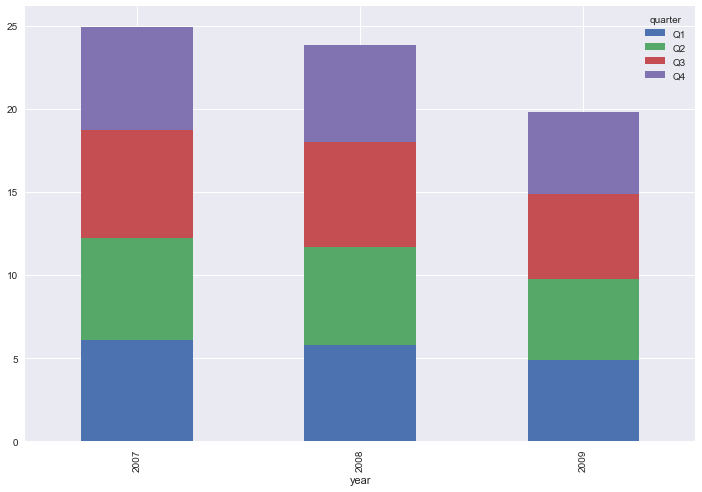

In [10]:
perf_interest_rate_df.plot(kind='bar', stacked=True)

Interest rate descended within the time period, which is the same as in the origination data.

#### Non-delinquency Ratio vs Quarter, Year

In [11]:
perf_non_deliquency_ratio_df = perf_summary_df.groupby(['year', 'quarter'])['nonDelinquencyRatio'].mean().unstack('quarter')
perf_non_deliquency_ratio_df.head()

quarter,Q1,Q2,Q3,Q4
year,,,,
2007,0.920169,0.911983,0.901654,0.900404
2008,0.930273,0.937864,0.932093,0.953924
2009,0.987295,0.990673,0.988521,0.989554


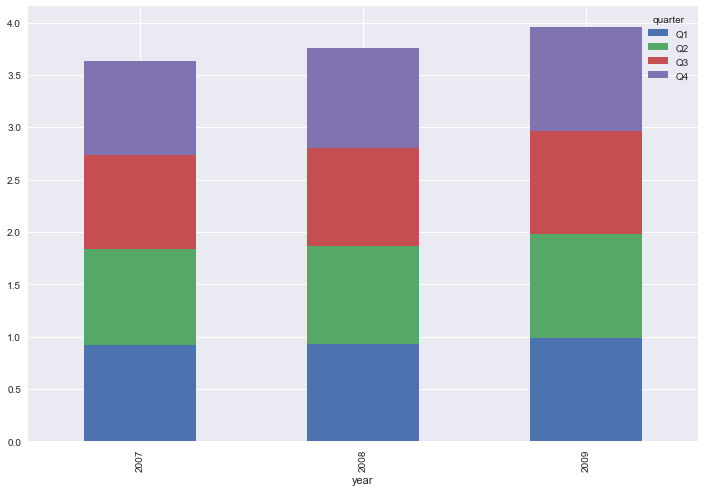

In [12]:
perf_non_deliquency_ratio_df.plot(kind='bar', stacked=True)

The non-deliquency ratio ascended within the time period, showing the increase in people's ability to pay the loan.